In [5]:
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import os 

class customCUBdataset (Dataset):
    def __init__(self, root_dir, transform = None):
        self.root_dir = root_dir # D:\TorchProject\dataset\cub\CUB_200_2011
        self.transform = transform
        self.image_dir = os.path.join(root_dir,'images')
        #self.label_file = os.path.join(root_dir,'image_class_labels.txt') - k sai but k toi uu
        #self.bbox_file = os.path.join(root_dir,'bounding_boxes.txt')
        #self.image_file = os.path.join(root_dir,'images.txt')
        #self.attribute_bbox_file = os.path.join(root_dir, 'attributes', 'image_attribute_labels.txt')
        #self.part_bbox_file = os.path.join(root_dir, 'parts', 'part_locs.txt')
        self.image_mapping = self._load_image_mapping()
        self.label_mapping = self._load_label_mapping()
        self.bbox_mapping = self._load_bounding_box ()
        self.attribute_mapping = self._load_attribute_mapping()
        self.part_bbox_mapping = self._load_part_bbox_mapping()

    def _load_label_mapping (self): # why "_load_..." ? --> chi dung trong class nay, k call dc tu ben ngoai
        label_mapping = {}
        label_file = os.path.join(self.root_dir,'image_class_labels.txt')
        with open(label_file, 'r') as file:
            for line in file:
                image_id, label_id = line.strip().split()
                label_mapping[image_id] = int(label_id)
        return label_mapping

    def _load_image_mapping (self):
        image_mapping = {}
        image_file = os.path.join(self.root_dir,'images.txt')
        with open(image_file, 'r') as file:
            for line in file:
                image_id, image_name = line.strip().split()
                image_mapping[image_id] = image_name
        return image_mapping

    def _load_bounding_box(self):
        bbox_mapping = {}
        box_file = os.path.join(self.root_dir, 'bounding_boxes.txt')
        with open(box_file, 'r') as file:
            for line in file:
                image_id, x, y, width, height = line.strip().split()
                bbox_mapping[image_id] = [float(x), float(y), float(width), float(height)]
        return bbox_mapping

    def _load_attribute_mapping(self):
        attribute_mapping = {}
        attribute_file = os.path.join(self.root_dir, 'attributes', 'image_attribute_labels.txt')
        with open(attribute_file, 'r') as file:
            for line in file:
                if len((line.strip().split())) != 5:
                    image_id, attribute_id, is_present, _, _, _ = line.strip().split()
                else:
                    image_id, attribute_id, is_present, _, _= line.strip().split()
                if is_present == '1':
                    if image_id not in attribute_mapping:
                        attribute_mapping[image_id] = []
                    attribute_mapping[image_id].append(attribute_id)
        return attribute_mapping

    def _load_part_bbox_mapping(self):
        part_bbox_mapping = {}
        part_bbox_file = os.path.join(self.root_dir, 'parts', 'part_locs_test.txt')
        with open(part_bbox_file, 'r') as file:
            for line in file:
                image_id, part_id, x, y, visible = line.strip().split()
                if visible == '1':
                    if image_id not in part_bbox_mapping:
                        part_bbox_mapping[image_id] = {}
                    part_bbox_mapping[image_id][part_id] = [float(x), float(y)]
        return part_bbox_mapping

    def __len__(self):
        return len(self.image_mapping)

    def __getitem__(self, index):
        label = self.label_mapping[str(index)]
        bbox = self.bbox_mapping[str(index)]
        attribute = self.attribute_mapping.get(str(index), [])
        part_bbox = self.part_bbox_mapping.get(str(index), {})
        image_name = self.image_mapping[str(index)]
        print(image_name)

        image= Image.open(os.path.join(self.image_dir,image_name)).convert('RGB')

        if self.transform:
           image = self.transform(image)

        return (image, label,bbox, attribute, part_bbox)

In [2]:
### Visualize bbox in image

11788
001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg
1 [60.0, 27.0, 325.0, 304.0] ['5', '98', '135', '137', '151', '165', '197', '218', '225', '263', '293', '308'] {'2': [312.0, 182.0], '5': [186.0, 45.0], '6': [247.0, 79.0], '10': [100.0, 221.0], '11': [183.0, 101.0], '15': [215.0, 194.0]}


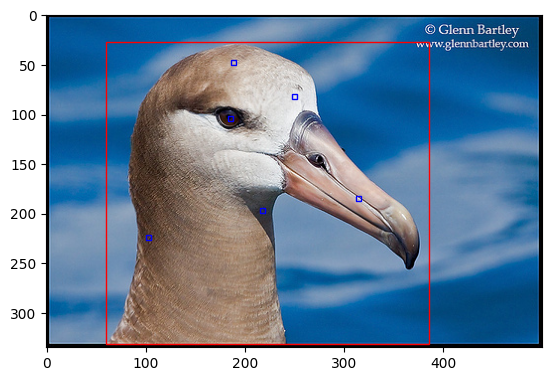

001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg
1 [139.0, 30.0, 153.0, 264.0] ['15', '30', '45', '52', '64', '76', '85', '95', '100', '104', '118', '126', '134', '146', '152', '158', '166', '173', '188', '210', '213', '219', '236', '254', '265', '292', '299'] {'1': [228.0, 138.0], '2': [282.0, 154.0], '4': [248.0, 158.0], '5': [266.0, 141.0], '6': [272.0, 144.0]}


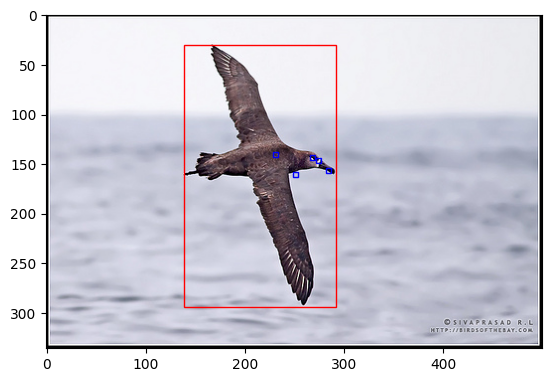

001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg
1 [14.0, 112.0, 388.0, 186.0] ['5', '11', '21', '24', '26', '30', '36', '55', '73', '96', '103', '107', '135', '146', '150', '165', '184', '212', '217', '220', '228', '240', '250', '293', '308', '311'] {}


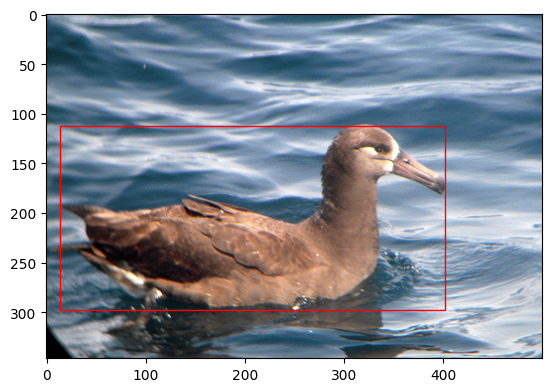

001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg
1 [112.0, 90.0, 255.0, 242.0] ['5', '11', '26', '60', '76', '81', '92', '98', '122', '146', '150', '158', '165', '215', '221', '228', '237', '241', '250', '280', '290', '295', '306', '309'] {}


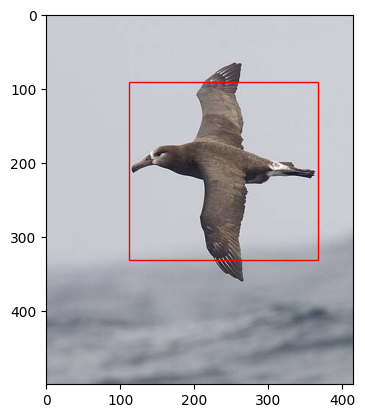

001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg
1 [70.0, 50.0, 134.0, 303.0] ['5', '11', '21', '41', '51', '55', '77', '102', '107', '117', '122', '132', '147', '151', '154', '164', '169', '184', '194', '199', '209', '214', '217', '218', '228', '241', '245', '250', '260', '280', '295', '305'] {}


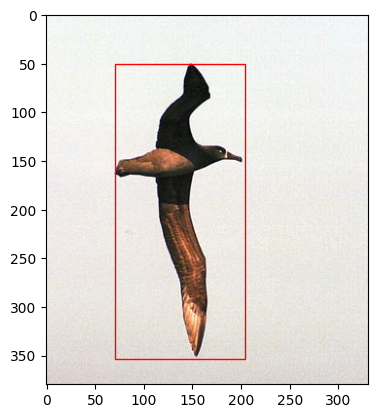

001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg
1 [33.0, 53.0, 251.0, 395.0] ['5', '11', '22', '24', '26', '36', '37', '39', '60', '71', '73', '77', '81', '92', '94', '104', '122', '133', '135', '146', '150', '165', '167', '184', '197', '213', '218', '235', '240', '244', '250', '263', '293', '306', '308', '310'] {}


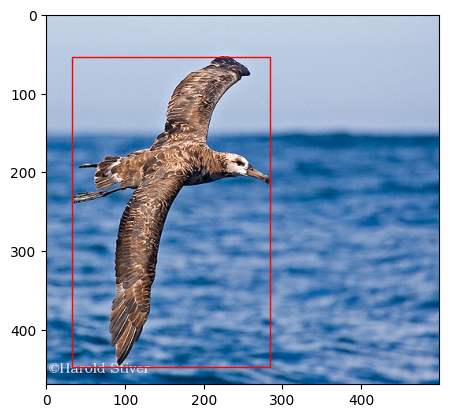

001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg
1 [7.0, 75.0, 420.0, 262.0] ['6', '101', '107', '135', '146', '150', '165', '184', '221', '226', '250', '280', '295'] {}


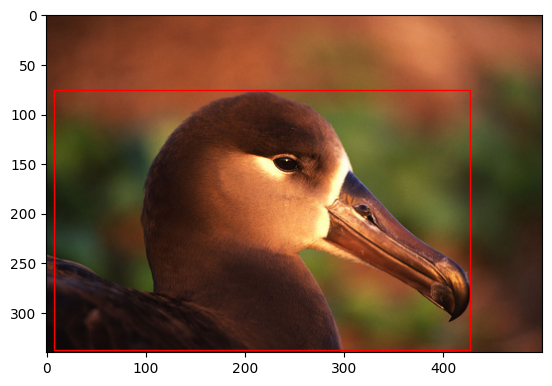

001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg
1 [78.0, 86.0, 333.0, 158.0] ['6', '11', '21', '26', '36', '37', '41', '51', '52', '58', '60', '70', '75', '81', '91', '100', '117', '122', '132', '146', '150', '165', '169', '179', '184', '194', '195', '199', '209', '213', '221', '226', '240', '244', '248', '250', '260', '265', '275', '280', '295', '306', '312'] {}


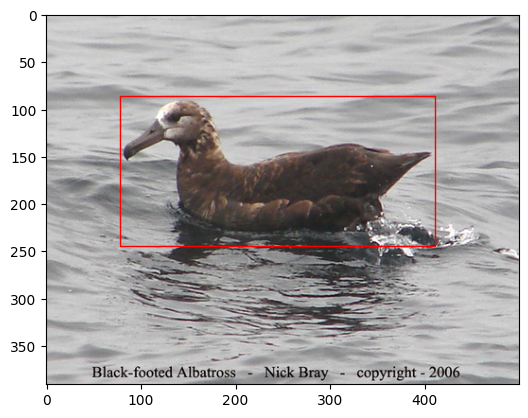

001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg
1 [112.0, 76.0, 221.0, 189.0] ['2', '11', '26', '45', '55', '60', '78', '85', '102', '111', '126', '146', '150', '158', '188', '203', '217', '219', '223', '237', '241', '245', '254', '284', '299', '309'] {}


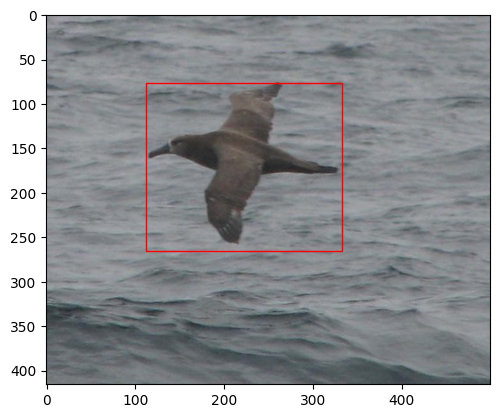

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torch.utils.data import DataLoader
import os

def visualize_bounding_box(image, bbox, part_bbox):
        # Create figure and axes
        fig, ax = plt.subplots(1)

        # Display the image
        ax.imshow(image)

    # # Extract bounding box coordinates
    #     x, y, width, height = bbox

    #     rect = patches.Rectangle((y), width, height, linewidth=1, edgecolor='r', facecolor='none')
    #     # Add the rectangle to the plot
    #     ax.add_patch(rect)

    #     #plt.show()


    #     # Iterate over part bounding boxes and draw rectangles
    #     for part_id, part_bb in part_bbox.items():
    #         x_pb, y_pb = part_bb
    #         width_pb, height_pb = 5, 5  # Modify the width and height as per your requirement

    #         rect_pb = patches.Rectangle((x_pb, y_pb), width_pb, height_pb, linewidth=1, edgecolor='b', facecolor='none')

    #         ax.add_patch(rect_pb)

    #         # Show the plot
    #     plt.show()

            # Extract bounding box coordinates
        x, y, width, height = bbox
        rect_pb = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')

        ax.add_patch(rect_pb)
        # Iterate over part bounding boxes and draw rectangles
        for _, part_bb in part_bbox.items():
            x_pb, y_pb = part_bb
            width_pb, height_pb = 5, 5  # Modify the width and height as per your requirement
            rect_pb = patches.Rectangle((x_pb, y_pb), width_pb, height_pb, linewidth=1, edgecolor='b', facecolor='none')
            ax.add_patch(rect_pb)

            # Show the plot
        plt.show()


# Example usage

root_dir = 'D:\TorchProject\dataset\cub\CUB_200_2011'
# run dataser == __init__
dataset = customCUBdataset(root_dir) # --> load sample to check
dataloader = DataLoader(dataset, batch_size=2, shuffle=False) #divide dataset by batch

# call len  == __len__
print (len(dataset))

# indexing in  dataset == __getitem__
# Get the image and bounding box at the specified index
#image,label,bbox,attribute,part_bbox = dataset[10]

for i in range (1,10):
    image, label,bbox, attribute, part_bbox = dataset[i]
    print (label,bbox,attribute,part_bbox)

    # Visualize all bounding boxes
    visualize_bounding_box(image, bbox, part_bbox)

In [ ]:
### #### CUB - 200 - 2011 ----- sample dataloader

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
#import torchvision
from torchvision import transforms
import os

class CustomCUBDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.image_lists = []

        img_dir_list = os.listdir(img_dir)

        for img_dir in img_dir_list:
            img_dir_list_path = os.path.join(self.img_dir, img_dir)
            img_path = [os.path.join(img_dir_list_path, img) for img in os.listdir(img_dir_list_path)]
            self.image_lists.extend(img_path)

    def __len__(self):
        return len(self.image_lists)

    def __getitem__(self, idx):
        img_path = self.image_lists[idx]

        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = int(img_path.split('/')[-1].split('.')[0])

        return image, label #, img_path

In [ ]:
# Example usage
root_dir = 'D:/TorchProject/dataset/cub/CUB_200_2011/images/'
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = CustomCUBDataset(root_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)